In [116]:
import numpy as np
import pandas
from sklearn.ensemble import RandomForestClassifier
import os
from sklearn.metrics import matthews_corrcoef, recall_score, roc_auc_score, balanced_accuracy_score, roc_curve, auc, confusion_matrix
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import KNNImputer, IterativeImputer
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold


In [2]:
from mlxtend.plotting import plot_decision_regions

In [3]:
os.chdir(r'E:\NNSience\Dwarfs\Brown-Dwarfs-NN\data')

In [4]:
df = pandas.read_csv('data1.csv')
df.head()

,SpT,PS1gmag,e_PS1gmag,PS1rmag,PS1imag,e_PS1imag,PS1zmag,e_PS1zmag,PS1ymag,e_PS1ymag,...,e_Ksmag,W1mag,e_W1mag,W2mag,e_W2mag,W3mag,e_W3mag,W4mag,e_W4mag,label
0,T4.5,NaN,NaN,NaN,NaN,NaN,19.17,0.01,17.42,0.01,...,0.12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True
1,L3.7INT-G,NaN,NaN,NaN,20.37,0.01,18.85,0.02,17.81,0.01,...,0.04,12.97,0.02,12.54,0.02,11.67,0.24,8.93,NaN,True
2,L1pec(blue),NaN,NaN,NaN,20.21,0.03,18.57,0.01,17.57,0.01,...,0.09,14.34,0.03,13.99,0.05,12.36,NaN,8.45,NaN,True
3,L5.5,NaN,NaN,NaN,22.30,0.08,20.30,0.04,19.31,0.03,...,0.22,14.82,0.03,14.57,0.06,11.73,NaN,8.10,NaN,True
4,L9,NaN,NaN,NaN,NaN,NaN,21.05,0.08,19.87,0.06,...,NaN,15.34,0.04,14.70,0.07,12.03,NaN,8.41,NaN,True


In [5]:
X = df.loc[:, 'PS1gmag':'e_W4mag']
y = df.loc[:, 'label']

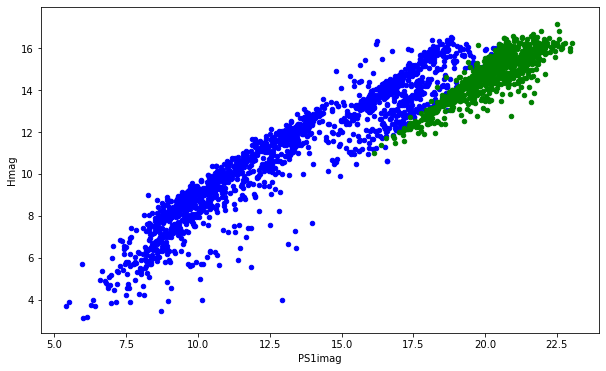

In [6]:
mag1='PS1imag'
mag2='Hmag'
df1 = df[df['label'] == False]
fp=df1.plot.scatter(x=mag1, y=mag2, c='b',figsize=(10, 6))
df2 = df[df['label'] == True]
df2.plot.scatter(x=mag1, y=mag2, c='g', ax=fp)
plt.show()

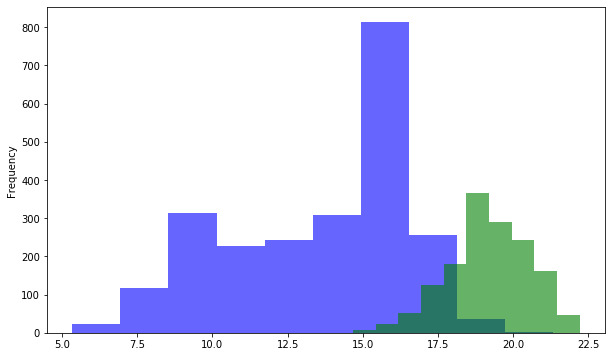

In [79]:
df1 = df[df['label'] == False].PS1zmag
fp=df1.plot.hist(alpha=0.6, color='b', figsize=(10, 6))
df2 = df[df['label'] == True].PS1zmag
df2.plot.hist(alpha=0.6, color='g')
plt.show()

In [8]:
imputer = KNNImputer(n_neighbors=3, weights="uniform")
X = imputer.fit_transform(X)
cols = df.loc[:, 'PS1gmag':'e_W4mag']
dx = pandas.DataFrame(data=X, columns=cols.columns)
dx.head()

,PS1gmag,e_PS1gmag,PS1rmag,PS1imag,e_PS1imag,PS1zmag,e_PS1zmag,PS1ymag,e_PS1ymag,Jmag,...,Ksmag,e_Ksmag,W1mag,e_W1mag,W2mag,e_W2mag,W3mag,e_W3mag,W4mag,e_W4mag
0,20.973000,0.136733,22.253333,20.846667,0.063333,19.17,0.01,17.42,0.01,15.06,...,14.840000,0.120000,14.39,0.036667,12.956667,0.03,11.94,0.300000,8.623333,0.520000
1,22.443333,0.160000,22.450000,20.370000,0.010000,18.85,0.02,17.81,0.01,15.52,...,13.710000,0.040000,12.97,0.020000,12.540000,0.02,11.67,0.240000,8.930000,0.433333
2,22.067333,0.152100,22.260000,20.210000,0.030000,18.57,0.01,17.57,0.01,15.71,...,14.700000,0.090000,14.34,0.030000,13.990000,0.05,12.36,0.456667,8.450000,0.476667
3,22.661333,0.121433,22.940000,22.300000,0.080000,20.30,0.04,19.31,0.03,17.17,...,15.660000,0.220000,14.82,0.030000,14.570000,0.06,11.73,0.320000,8.100000,0.433333
4,22.661333,0.084433,22.580000,22.623333,0.140000,21.05,0.08,19.87,0.06,17.36,...,15.593333,0.113333,15.34,0.040000,14.700000,0.07,12.03,0.370000,8.410000,0.420000


In [9]:
X_train, x_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=123)
x_val, x_test, y_val, y_test = train_test_split(x_temp, y_temp, test_size=0.5, random_state=123)

Cleaned data from columns with "errors" of magnitude

In [19]:
df = pandas.read_csv('data2.csv')
df.head()

,SpT,PS1gmag,PS1rmag,PS1imag,PS1zmag,PS1ymag,Jmag,Hmag,Ksmag,W1mag,W2mag,W3mag,W4mag,label
0,T4.5,NaN,NaN,NaN,19.17,17.42,15.06,14.73,14.84,NaN,NaN,NaN,NaN,True
1,L3.7INT-G,NaN,NaN,20.37,18.85,17.81,15.52,14.51,13.71,12.97,12.54,11.67,8.93,True
2,L1pec(blue),NaN,NaN,20.21,18.57,17.57,15.71,15.03,14.70,14.34,13.99,12.36,8.45,True
3,L5.5,NaN,NaN,22.30,20.30,19.31,17.17,16.06,15.66,14.82,14.57,11.73,8.10,True
4,L9,NaN,NaN,NaN,21.05,19.87,NaN,NaN,NaN,15.34,14.70,12.03,8.41,True


In [308]:
X = df.loc[:, 'PS1imag':'W4mag']
y = df.loc[:, 'label']
cols = df.loc[:, 'PS1gmag':'W4mag']

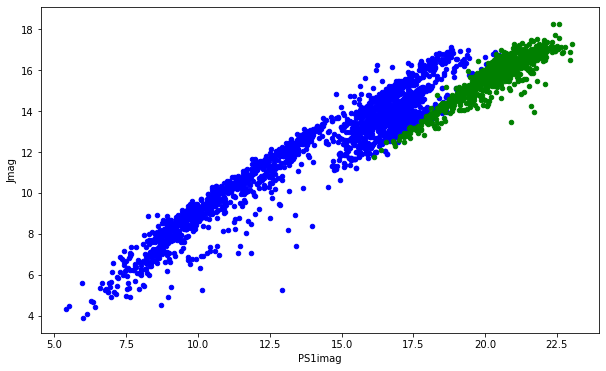

In [12]:
mag1='PS1imag'
mag2='Jmag'
df1 = df[df['label'] == False]
fp=df1.plot.scatter(x=mag1, y=mag2, c='b',figsize=(10, 6))
df2 = df[df['label'] == True]
df2.plot.scatter(x=mag1, y=mag2, c='g', ax=fp)
plt.show()

Imputing missing values with KNN imputer

,PS1gmag,PS1rmag,PS1imag,PS1zmag,PS1ymag,Jmag,Hmag,Ksmag,W1mag,W2mag,W3mag,W4mag,i_z,z_y,y_J,z_J,J_H,H_Ks,W1_W2
0,NaN,NaN,NaN,19.17,17.42,15.06,14.73,14.84,NaN,NaN,NaN,NaN,NaN,1.75,2.36,4.11,0.33,-0.11,NaN
1,NaN,NaN,20.37,18.85,17.81,15.52,14.51,13.71,12.97,12.54,11.67,8.93,1.52,1.04,2.29,3.33,1.01,0.80,0.43
2,NaN,NaN,20.21,18.57,17.57,15.71,15.03,14.70,14.34,13.99,12.36,8.45,1.64,1.00,1.86,2.86,0.68,0.33,0.35
3,NaN,NaN,22.30,20.30,19.31,17.17,16.06,15.66,14.82,14.57,11.73,8.10,2.00,0.99,2.14,3.13,1.11,0.40,0.25
4,NaN,NaN,NaN,21.05,19.87,NaN,NaN,NaN,15.34,14.70,12.03,8.41,NaN,1.18,NaN,NaN,NaN,NaN,0.64


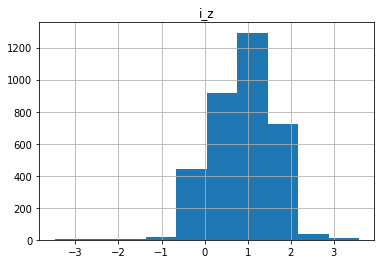

In [309]:
dx = pandas.DataFrame(data=X, columns=cols.columns)
dx['i_z'] = dx['PS1imag']-dx['PS1zmag']
dx['z_y'] = dx['PS1zmag']-dx['PS1ymag']
dx['y_J'] = dx['PS1ymag']-dx['Jmag']
dx['z_J'] = dx['PS1zmag']-dx['Jmag']
dx['J_H'] = dx['Jmag']-dx['Hmag']
dx['H_Ks'] = dx['Hmag']-dx['Ksmag']
dx['W1_W2'] = dx['W1mag']-dx['W2mag']
X_ = np.array(dx.loc[:, 'PS1imag':'W1_W2'])
dx.hist('i_z')
dx.head()

In [24]:
from sklearn.ensemble import ExtraTreesRegressor

c:\Users\saser\Anaconda3\lib\site-packages\sklearn\impute\_iterative.py:638: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  " reached.", ConvergenceWarning)


,PS1imag,PS1zmag,PS1ymag,Jmag,Hmag,Ksmag,W1mag,W2mag,W3mag,W4mag,i_z,z_y,y_J,z_J,J_H,H_Ks,W1_W2
0,20.829051,19.17,17.42,15.060000,14.73000,14.840000,14.37436,13.048129,11.642947,8.82143,2.100634,1.75,2.360000,4.110000,0.330000,-0.110000,1.560917
1,20.370000,18.85,17.81,15.520000,14.51000,13.710000,12.97000,12.540000,11.670000,8.93000,1.520000,1.04,2.290000,3.330000,1.010000,0.800000,0.430000
2,20.210000,18.57,17.57,15.710000,15.03000,14.700000,14.34000,13.990000,12.360000,8.45000,1.640000,1.00,1.860000,2.860000,0.680000,0.330000,0.350000
3,22.300000,20.30,19.31,17.170000,16.06000,15.660000,14.82000,14.570000,11.730000,8.10000,2.000000,0.99,2.140000,3.130000,1.110000,0.400000,0.250000
4,22.425829,21.05,19.87,17.306151,16.24129,15.705414,15.34000,14.700000,12.030000,8.41000,1.613149,1.18,2.366643,3.615649,0.966573,0.676372,0.640000


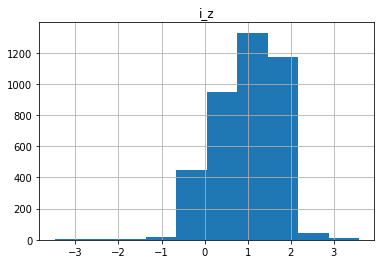

In [310]:
imputer = IterativeImputer(estimator=ExtraTreesRegressor(n_estimators=20, max_features=5, max_depth=10, min_samples_split=20), max_iter=10, random_state=123)
X = imputer.fit_transform(X_)
cols = dx.loc[:, 'PS1imag':'W1_W2']
dx = pandas.DataFrame(data=X, columns=cols.columns)
dx.hist('i_z')
dx.head()

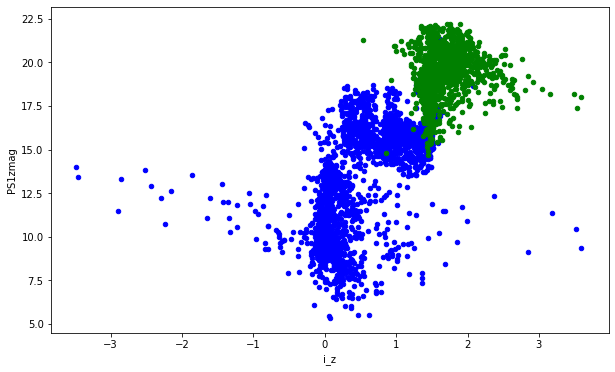

In [178]:
mag1='i_z'
mag2='PS1zmag'
df1 = dx[df['label'] == False]
fp=df1.plot.scatter(x=mag1, y=mag2, c='b',figsize=(10, 6))
df2 = dx[df['label'] == True]
df2.plot.scatter(x=mag1, y=mag2, c='g', ax=fp)
plt.show()

Test of learning rules on L&T data sample with Carnero Rosell et al.(2019) and Burningham et al.(2013)
Lots of objects were initially misclassified due to the lack of the data needed. The results after imputing with IterImp:

In [312]:
X_train, x_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=123)
x_val, x_test, y_val, y_test = train_test_split(x_temp, y_temp, test_size=0.5, random_state=123)

In [322]:
cols = dx.loc[:, 'PS1imag':'W1_W2']
pos = pandas.DataFrame(data=x_val, columns=cols.columns)
#pos = dx[~dx.isnull().any(axis=1)]
mask =  (pos['z_y']>0.15) & (pos['i_z']>1.2) & (pos['y_J']>1.6) & (pos['PS1zmag']<22)
#mask =  (pos['z_J']>2.5) & (pos['Jmag']<18.8)
#mask = (pos['y_J']>0.8) & (pos['Jmag']<17.5)
corr_dr = matthews_corrcoef(mask, y_val)
print(corr_dr)

0.8628929275246982


Text(69.0, 0.5, 'Actual Class ')

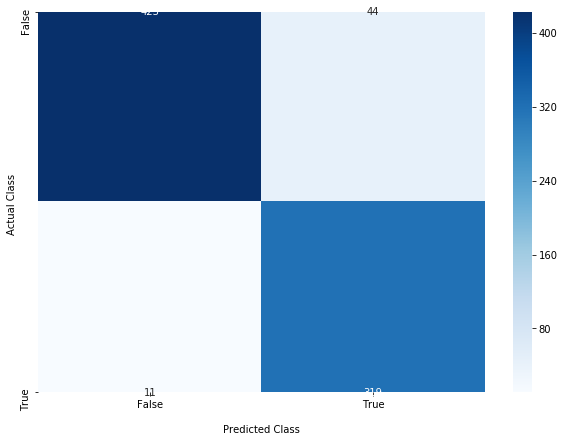

In [323]:
cf_matrix = confusion_matrix(y_val, mask)
fig, ax = plt.subplots(figsize=(10,7))
sns.heatmap(cf_matrix, cmap='Blues', annot=True, fmt='d')
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])
ax.set_xlabel('\nPredicted Class')
ax.set_ylabel('Actual Class ')

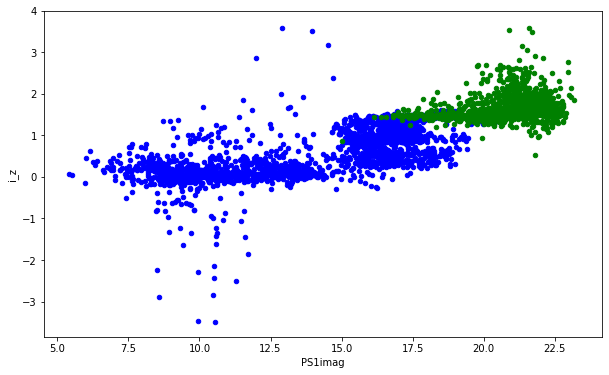

In [219]:
mag1='PS1imag'
mag2='i_z'
dx1 = dx[y == False]
fp=dx1.plot.scatter(x=mag1, y=mag2, c='b',figsize=(10, 6))
df2 = dx[y == True]
df2.plot.scatter(x=mag1, y=mag2, c='g', ax=fp)
plt.show()

In [221]:
scaler = StandardScaler()

In [222]:
X_train2 = scaler.fit_transform(X_train)
x_val2 = scaler.transform(x_val)
x_test2 = scaler.transform(x_test)

Random Forest:

In [446]:
parameters = {'n_estimators':[10, 20, 50, 100, 200], 'max_depth':[3, 5, 10, 15, 20], 
              'min_samples_split':[2, 4, 5, 8], 'class_weight':['balanced_subsample']}
rf = RandomForestClassifier()
skf = StratifiedKFold(n_splits=5)
rclf = GridSearchCV(rf, parameters, cv=skf)
rclf.fit(X_train2, y_train)
rclf.best_estimator_

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                       class_weight='balanced_subsample', criterion='gini',
                       max_depth=5, max_features='auto', max_leaf_nodes=None,
                       max_samples=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=100, n_jobs=None, oob_score=False,
                       random_state=None, verbose=0, warm_start=False)

In [447]:
model_rf = rclf.best_estimator_
model_rf.fit(X_train2, y_train)
y_pred_rf = model_rf.predict(x_val2)
corr_rf = matthews_corrcoef(y_pred_rf, y_val)
print(corr_rf)

0.9664581690020908


Selecting features with selector (for Boruta see below)

In [448]:
sffs = SequentialFeatureSelector(
           rf,
           k_features = 16,
           forward=True, 
           floating=True, # use ADD-DEL
           verbose=0,
           scoring='balanced_accuracy',
           cv=skf)

sffs.fit(X_train2,y_train)
df_sffs = pandas.DataFrame.from_dict(sffs.get_metric_dict()).T
df_sffs 

,avg_score,ci_bound,cv_scores,feature_idx,feature_names,std_dev,std_err
1,0.951029,0.00890802,"[0.9599055308397869, 0.9389214966984593, 0.949...","(11,)","(11,)",0.00693074,0.00346537
2,0.979351,0.00623738,"[0.9816828692261218, 0.9736977256052824, 0.974...","(3, 11)","(3, 11)",0.0048529,0.00242645
3,0.981851,0.00850466,"[0.9860584756778528, 0.9729090242112985, 0.987...","(3, 9, 11)","(3, 9, 11)",0.00661691,0.00330846
4,0.983604,0.00670232,"[0.9843283718716245, 0.9790168745414527, 0.985...","(3, 9, 11, 13)","(3, 9, 11, 13)",0.00521463,0.00260732
5,0.98326,0.00626913,"[0.9860584756778528, 0.9772927366104182, 0.987...","(3, 7, 9, 11, 13)","(3, 7, 9, 11, 13)",0.0048776,0.0024388
6,0.982725,0.00675966,"[0.9887039783233554, 0.9755685986793836, 0.985...","(3, 7, 8, 9, 11, 13)","(3, 7, 8, 9, 11, 13)",0.00525924,0.00262962
7,0.984138,0.00522868,"[0.9860584756778528, 0.9772927366104182, 0.987...","(3, 7, 8, 9, 10, 11, 13)","(3, 7, 8, 9, 10, 11, 13)",0.00406809,0.00203404
8,0.984508,0.00850236,"[0.9887039783233554, 0.9755685986793836, 0.990...","(3, 5, 7, 8, 9, 10, 11, 13)","(3, 5, 7, 8, 9, 10, 11, 13)",0.00661512,0.00330756
9,0.984138,0.00565801,"[0.9860584756778528, 0.9772927366104182, 0.985...","(3, 5, 7, 8, 9, 10, 11, 13, 15)","(3, 5, 7, 8, 9, 10, 11, 13, 15)",0.00440212,0.00220106
10,0.985042,0.00476094,"[0.9843283718716245, 0.9799523110785033, 0.987...","(5, 6, 7, 8, 9, 10, 11, 13, 14, 15)","(5, 6, 7, 8, 9, 10, 11, 13, 14, 15)",0.00370417,0.00185209


In [449]:
X2_train = X_train2[:,[5, 6, 7, 8, 9, 10, 11, 13, 14, 15]]
x2_val = x_val2[:,[5, 6, 7, 8, 9, 10, 11, 13, 14, 15]]

In [450]:
model_rf = rclf.best_estimator_
model_rf.fit(X2_train, y_train)
y_pred_rf = model_rf.predict(x2_val)
corr_rf = matthews_corrcoef(y_pred_rf, y_val)
print(corr_rf)

0.9665393730087775


In [451]:
features = [1,2]

dict_v = {i:X2_train[:,i].mean() for i in range(len(X2_train[0])) if i not in features}
dict_vv = {i:X2_train.std(0)[i]+5 for i in range(len(X2_train[0])) if i not in features}

c:\Users\saser\Anaconda3\lib\site-packages\mlxtend\plotting\decision_regions.py:246: UserWarning: No contour levels were found within the data range.
  antialiased=True)


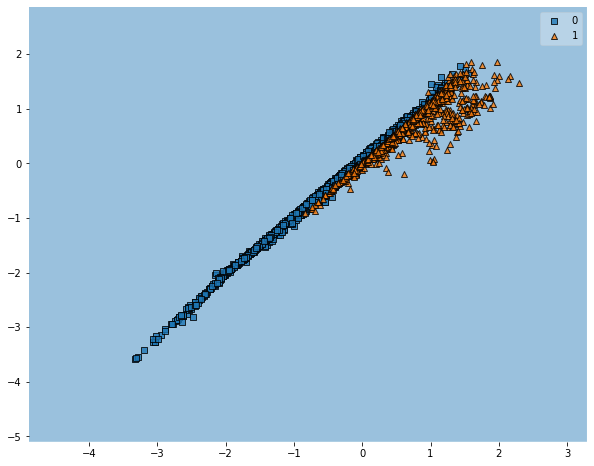

In [452]:
fig, axarr = plt.subplots(1, 1, figsize=(10,8), sharex=True, sharey=True)
plot_decision_regions(X2_train, np.array([int(i) for i in y_train.to_list()]), clf=model_rf,
                      feature_index=features,
                      filler_feature_values={x:dict_v[x] for x in range(len(X2_train[0])) if x not in features},
                      filler_feature_ranges=dict_vv, ax=axarr)

Text(69.0, 0.5, 'Actual Class ')

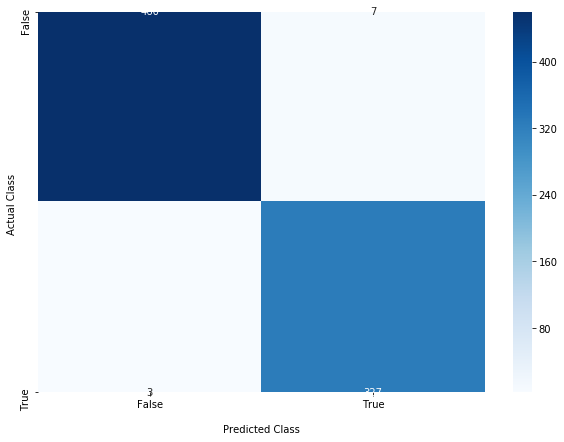

In [444]:
cf_matrix_rf = confusion_matrix(y_true = y_val, y_pred=y_pred_rf)
fig, ax = plt.subplots(figsize=(10,7))
sns.heatmap(cf_matrix_rf, cmap='Blues', annot=True, fmt='d')
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])
ax.set_xlabel('\nPredicted Class')
ax.set_ylabel('Actual Class ')

SVM:

In [426]:
from sklearn import svm

In [438]:
svc_clf = svm.SVC(kernel='rbf', C=0.1, class_weight='balanced', gamma='auto',decision_function_shape='ovr', random_state=123, probability=True)
svc_clf.fit(X_train2, y_train)
y_pred_svc = svc_clf.predict(x_val2)
corr_rf = matthews_corrcoef(y_pred_svc, y_val)
print(corr_rf)

0.9691687825855085


In [292]:
sffs = SequentialFeatureSelector(
           model_rf,
           k_features = 16,
           forward=True, 
           floating=True, # use ADD-DEL
           verbose=0,
           scoring='balanced_accuracy',
           cv=skf)

sffs.fit(X_train2,y_train)
df_sffs = pandas.DataFrame.from_dict(sffs.get_metric_dict()).T
df_sffs 

,avg_score,ci_bound,cv_scores,feature_idx,feature_names,std_dev,std_err
1,0.947763,0.00977605,"[0.9599055308397869, 0.9364086573734409, 0.949...","(11,)","(11,)",0.0076061,0.00380305
2,0.982727,0.0040317,"[0.9843283718716245, 0.9790168745414527, 0.982...","(0, 11)","(0, 11)",0.0031368,0.0015684
3,0.984297,0.00542347,"[0.9834129730323502, 0.9798055759354365, 0.990...","(1, 11, 15)","(1, 11, 15)",0.00421964,0.00210982
4,0.983043,0.00482503,"[0.9860584756778528, 0.9798055759354365, 0.986...","(1, 5, 11, 15)","(1, 5, 11, 15)",0.00375403,0.00187702
5,0.984294,0.00351673,"[0.9860584756778528, 0.9824651504035216, 0.987...","(1, 3, 5, 11, 15)","(1, 3, 5, 11, 15)",0.00273613,0.00136807
6,0.984639,0.00574916,"[0.9860584756778528, 0.9788701393983859, 0.987...","(1, 3, 4, 5, 11, 15)","(1, 3, 4, 5, 11, 15)",0.00447304,0.00223652
7,0.985013,0.00518131,"[0.9860584756778528, 0.9807410124724871, 0.990...","(1, 3, 4, 5, 10, 11, 15)","(1, 3, 4, 5, 10, 11, 15)",0.00403123,0.00201562
8,0.985732,0.00757626,"[0.9860584756778528, 0.9763573000733676, 0.990...","(1, 3, 4, 5, 10, 11, 14, 15)","(1, 3, 4, 5, 10, 11, 14, 15)",0.00589459,0.00294729
9,0.984484,0.006971,"[0.9834129730323502, 0.9780814380044021, 0.987...","(1, 3, 4, 5, 9, 10, 11, 14, 15)","(1, 3, 4, 5, 9, 10, 11, 14, 15)",0.00542368,0.00271184
10,0.984669,0.00723546,"[0.9843283718716245, 0.9763573000733676, 0.987...","(0, 1, 3, 4, 5, 9, 10, 11, 14, 15)","(0, 1, 3, 4, 5, 9, 10, 11, 14, 15)",0.00562943,0.00281472


In [428]:
X2_train = X_train2[:,[1, 3, 4, 5, 10, 11, 14, 15]]
x2_val = x_val2[:,[1, 3, 4, 5, 10, 11, 14, 15]]

In [439]:
parameters = {'kernel':('linear', 'rbf'), 'C':[0.01, 0.1, 0.5, 1, 2, 5, 10, 20, 50], 'gamma':('scale', 'auto'), 
              'class_weight':['balanced'], 'coef0':[0.0, 0.01, 0.1, 0.5, 1, 2]}
svc = svm.SVC()
skf = StratifiedKFold(n_splits=5)
clf = GridSearchCV(svc, parameters, cv=skf)
clf.fit(X_train2, y_train)
clf.best_estimator_

SVC(C=20, break_ties=False, cache_size=200, class_weight='balanced', coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [442]:
bclf = clf.best_estimator_
bclf.fit(X_train2, y_train)
y_pred_bclf=bclf.predict(x_val2)
matthews_corrcoef(y_val, y_pred_bclf)

0.9639142152809522

Text(69.0, 0.5, 'Actual Class ')

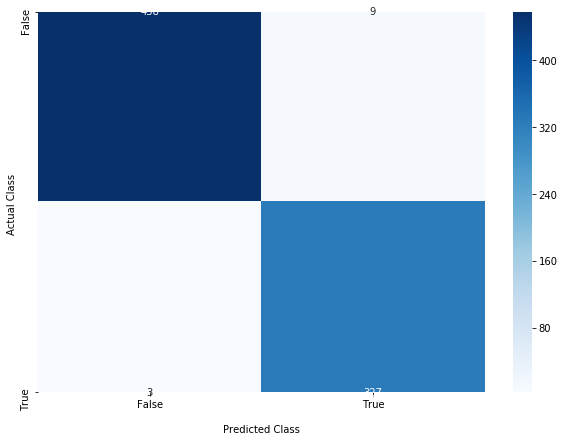

In [340]:
cf_matrix_svm = confusion_matrix(y_true = y_val, y_pred=y_pred_svc)
fig, ax = plt.subplots(figsize=(10,7))
sns.heatmap(cf_matrix_svm, cmap='Blues', annot=True, fmt='d')
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])
ax.set_xlabel('\nPredicted Class')
ax.set_ylabel('Actual Class ')

In [341]:
features = [1,4]

dict_v = {i:X2_train[:,i].mean() for i in range(len(X2_train[0])) if i not in features}
dict_vv = {i:(X2_train.std(0)[i]+5) for i in range(len(X2_train[0])) if i not in features}

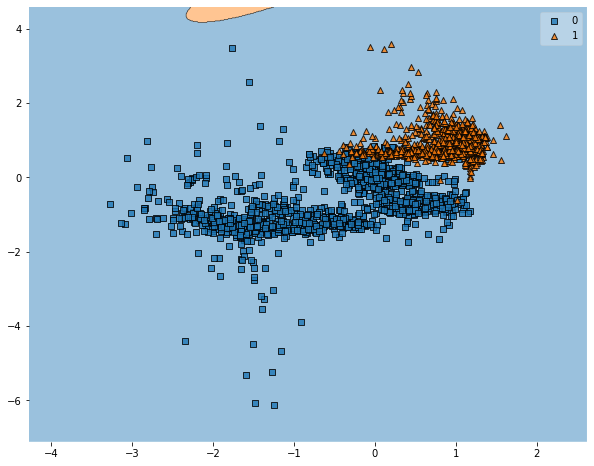

In [342]:
fig, axarr = plt.subplots(1, 1, figsize=(10,8), sharex=True, sharey=True)
plot_decision_regions(X2_train, np.array([int(i) for i in y_train.to_list()]), clf=bclf,
                      feature_index=features,
                      filler_feature_values={x:dict_v[x] for x in range(len(X2_train[0])) if x not in features},
                      filler_feature_ranges=dict_vv, ax=axarr)

XGBoost, in process

In [ ]:
import xgboost

In [ ]:
xgb_clf = xgboost.XGBClassifier(max_depth=5, n_estimators=500, booster='gbtree',
                            n_jobs=2, random_state=1)

In [ ]:
xgb_clf.fit(X_train2, y_train)
y_pred_xgb = xgb_clf.predict(x_val2)
corr_rf = roc_auc_score(y_pred_xgb, y_val)
print(corr_rf)

c:\Users\saser\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:13:06] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
0.9840814872392797


c:\Users\saser\Anaconda3\lib\site-packages\mlxtend\plotting\decision_regions.py:246: UserWarning: No contour levels were found within the data range.
  antialiased=True)
c:\Users\saser\Anaconda3\lib\site-packages\mlxtend\plotting\decision_regions.py:246: UserWarning: No contour levels were found within the data range.
  antialiased=True)
c:\Users\saser\Anaconda3\lib\site-packages\mlxtend\plotting\decision_regions.py:246: UserWarning: No contour levels were found within the data range.
  antialiased=True)
c:\Users\saser\Anaconda3\lib\site-packages\mlxtend\plotting\decision_regions.py:246: UserWarning: No contour levels were found within the data range.
  antialiased=True)


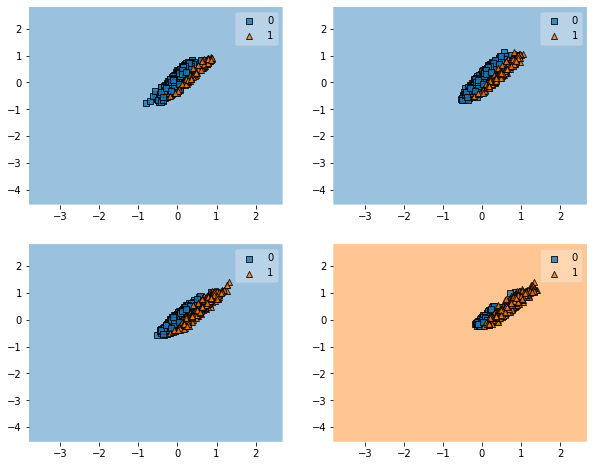

In [ ]:
fig, axarr = plt.subplots(2, 2, figsize=(10,8), sharex=True, sharey=True)
for i, ax in enumerate(axarr.flat):
    plot_decision_regions(X_train2, np.array([int(i) for i in y_train.to_list()]), clf=xgb_clf,
                      feature_index=features,
                      filler_feature_values={x:dict_v[x][i] for x in range(len(X_train2[0])) if x not in features},
                      filler_feature_ranges=dict_vv,ax=ax)

TabNet

In [383]:
from pytorch_tabnet.tab_model import  TabNetClassifier
import torch

In [384]:
tbn_clf1= TabNetClassifier(optimizer_fn=torch.optim.Adam,
                       optimizer_params=dict(lr=2e-2),
                       scheduler_params={"step_size":10, # how to use learning rate scheduler
                                         "gamma":0.9},
                       scheduler_fn=torch.optim.lr_scheduler.StepLR,
                       mask_type='entmax' # "sparsemax"
                      )

Device used : cpu


Tuned in optuna in
 colab:
{'epochs': 92,
 'gamma': 1.2,
 'n_da': 26,
 'n_shared': 1,
 'n_steps': 2}

In [422]:
tbn_clf = TabNetClassifier(n_a=26, n_d=26, n_shared=1, n_steps=2, gamma=1.2, optimizer_fn=torch.optim.Adam,
                       optimizer_params=dict(lr=2e-2),
                       scheduler_params={"step_size":10, 
                                         "gamma":0.9},
                       scheduler_fn=torch.optim.lr_scheduler.StepLR,
                       mask_type='entmax')
tbn_clf.fit(X_train2, y_train,            
    eval_set=[(X_train2, y_train), (x_val2, y_val)],
    eval_name=['train', 'valid'],
    eval_metric=['balanced_accuracy'],
    max_epochs=1000 , patience=50,
    batch_size=256, virtual_batch_size=128,
    num_workers=0,
    weights=1,
    drop_last=False)
y_pred_tbn = tbn_clf.predict(x_val2)
corr_tbn = matthews_corrcoef(y_pred_tbn, y_val)
print(corr_tbn)

Device used : cpu
epoch 0  | loss: 0.28192 | train_balanced_accuracy: 0.93854 | valid_balanced_accuracy: 0.9396  |  0:00:02s
epoch 1  | loss: 0.07128 | train_balanced_accuracy: 0.96406 | valid_balanced_accuracy: 0.96529 |  0:00:04s
epoch 2  | loss: 0.06572 | train_balanced_accuracy: 0.97235 | valid_balanced_accuracy: 0.97493 |  0:00:07s
epoch 3  | loss: 0.05888 | train_balanced_accuracy: 0.97046 | valid_balanced_accuracy: 0.97386 |  0:00:08s
epoch 4  | loss: 0.05923 | train_balanced_accuracy: 0.98141 | valid_balanced_accuracy: 0.98733 |  0:00:10s
epoch 5  | loss: 0.05713 | train_balanced_accuracy: 0.97684 | valid_balanced_accuracy: 0.98287 |  0:00:12s
epoch 6  | loss: 0.05818 | train_balanced_accuracy: 0.98441 | valid_balanced_accuracy: 0.9835  |  0:00:14s
epoch 7  | loss: 0.06901 | train_balanced_accuracy: 0.97718 | valid_balanced_accuracy: 0.97921 |  0:00:15s
epoch 8  | loss: 0.06127 | train_balanced_accuracy: 0.9839  | valid_balanced_accuracy: 0.98047 |  0:00:17s
epoch 9  | loss: 0.

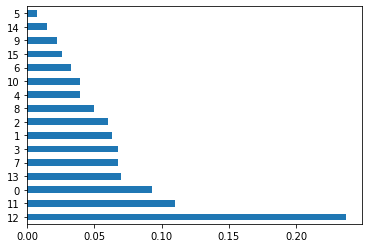

In [423]:
tbn_clf.feature_importances_
feat_importances = pandas.Series(tbn_clf.feature_importances_)
feat_importances.nlargest(20).plot(kind='barh')

Text(69.0, 0.5, 'Actual Class ')

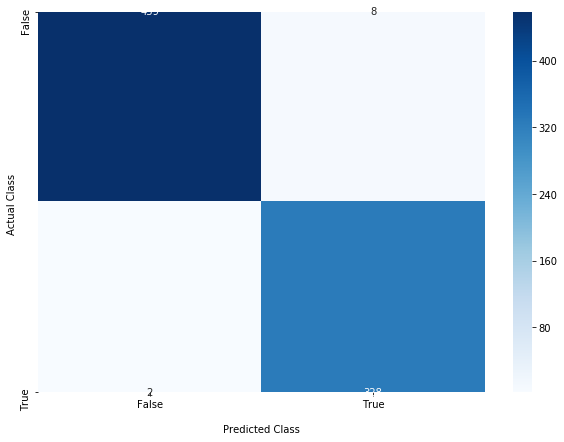

In [418]:
cf_matrix_tbn = confusion_matrix(y_val, y_pred_tbn)
fig, ax = plt.subplots(figsize=(10,7))
sns.heatmap(cf_matrix_tbn, cmap='Blues', annot=True, fmt='d')
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])
ax.set_xlabel('\nPredicted Class')
ax.set_ylabel('Actual Class ')

In [353]:
features = [1,4]

dict_v = {i:X_train2[:,i].mean() for i in range(len(X_train2[0])) if i not in features}
dict_vv = {i:(X_train2.std(0)[i]+5) for i in range(len(X_train2[0])) if i not in features}

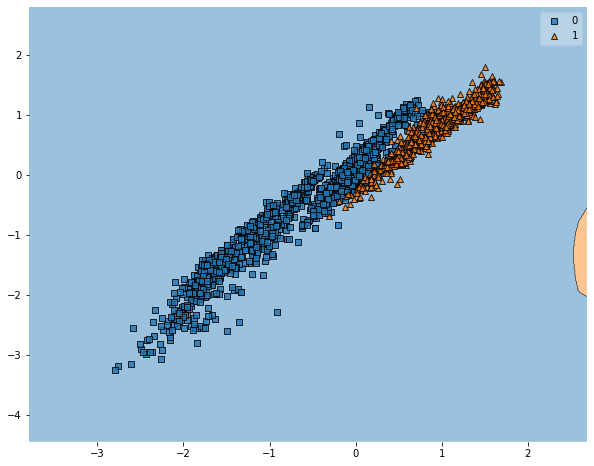

In [354]:
fig, axarr = plt.subplots(1, 1, figsize=(10,8), sharex=True, sharey=True)
plot_decision_regions(X_train2, np.array([int(i) for i in y_train.to_list()]), clf=tbn_clf,
                      feature_index=features,
                      filler_feature_values={x:dict_v[x] for x in range(len(X_train2[0])) if x not in features},
                      filler_feature_ranges=dict_vv, ax=axarr)

Voting Classifier

In [356]:
from sklearn.ensemble import VotingClassifier

In [406]:
eclf1 = VotingClassifier(estimators=[('rf', model_rf), ('svm', svc_clf)], voting='hard')
eclf1 = eclf1.fit(X_train2, y_train)
y_pred_v1 = eclf1.predict(x_val2)

In [407]:
corr_v1 = matthews_corrcoef(y_pred_v1, y_val)
print(corr_tbn)

0.974327275160727


Text(69.0, 0.5, 'Actual Class ')

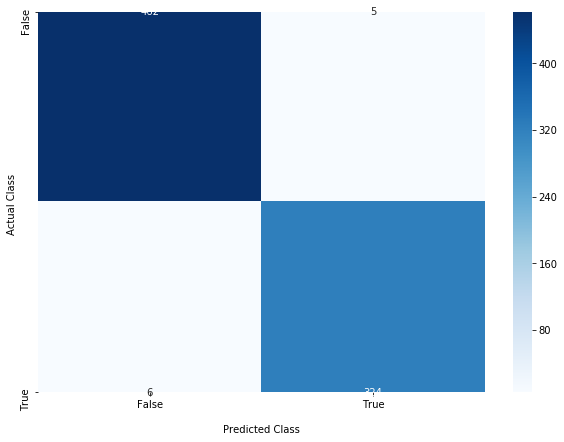

In [408]:
cf_matrix_v1 = confusion_matrix(y_val, y_pred_v1)
fig, ax = plt.subplots(figsize=(10,7))
sns.heatmap(cf_matrix_v1, cmap='Blues', annot=True, fmt='d')
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])
ax.set_xlabel('\nPredicted Class')
ax.set_ylabel('Actual Class ')

Training on 2 features

In [64]:
X2_train = X_train2[:,[4, 15]]
x2_val = x_val2[:,[4, 15]]


In [195]:
parameters = {'kernel':['linear', 'rbf'], 'C':[1, 2, 5, 10, 20], 'gamma':('scale', 'auto'), 
              'class_weight':['balanced'], 'probability':[0.9]}
svc = svm.SVC()
skf = StratifiedKFold(n_splits=5)
clf = GridSearchCV(svc, parameters, cv=skf)
clf.fit(X2_train, y_train)
clf.best_estimator_

SVC(C=20, break_ties=False, cache_size=200, class_weight='balanced', coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=0.9, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

In [208]:
des_svc = rclf.best_estimator_
des_svc.fit(X2_train, y_train)
y_pred_dsvc2=des_svc.predict(x2_val)

Text(0.5, 1.0, 'RF')

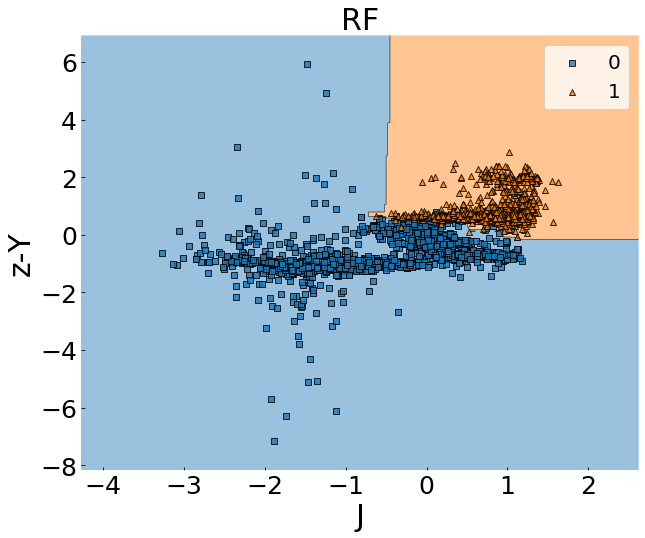

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(10,8), sharex=True, sharey=True)
#for i, ax in enumerate(axarr.flat):
plot_decision_regions(X2_train, np.array([int(i) for i in y_train.to_list()]), clf=des_svc)
ax.set_xlabel('J', size=30)
ax.set_ylabel('z-Y', size=30)
ax.tick_params(axis="y",direction="in")
ax.tick_params(axis="x",direction="in")
plt.legend(prop={'size': 20})
xax = ax.xaxis 
xlabels1 = xax.get_ticklabels()
for label in xlabels1:
    # размер шрифта подписей делений оси OX 
    label.set_fontsize(25)     
yax = ax.yaxis 
ylabels1 = yax.get_ticklabels()
for label in ylabels1:
    # размер шрифта подписей делений оси OX 
    label.set_fontsize(25)
plt.title('RF', size=30)    

In [355]:
dfy= pandas.DataFrame(data=y_val.values, columns=['y_true'])
dfy['y_pred_rf'] = y_pred_rf
dfy['y_pred_svm'] = y_pred_bclf
dfy['y_pred_tab'] = y_pred_tbn

dfy.loc[dfy['y_true']!=dfy['y_pred_svm']]

,y_true,y_pred_rf,y_pred_svm,y_pred_tab
20,True,True,False,True
99,False,True,True,False
157,False,True,True,True
171,False,True,True,True
232,False,True,True,True
293,False,False,True,False
297,False,True,True,True
324,True,False,False,False
330,False,True,True,True
335,True,False,False,False


Selecting features with Boruta

In [ ]:
from boruta import BorutaPy

In [ ]:
feat_selector = BorutaPy(model_rf, n_estimators='auto', verbose=2, random_state=42, perc=0.90, two_step=False)

In [ ]:
feat_selector.fit(X_train2, y_train)

Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	16
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	16
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	16
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	16
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	16
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	16
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	16
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	0
Tentative: 	16
Rejected: 	0
Iteration: 	9 / 100
Confirmed: 	16
Tentative: 	0
Rejected: 	0


BorutaPy finished running.

Iteration: 	10 / 100
Confirmed: 	16
Tentative: 	0
Rejected: 	0


BorutaPy(alpha=0.05,
         estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                          class_weight='balanced',
                                          criterion='gini', max_depth=5,
                                          max_features='auto',
                                          max_leaf_nodes=None, max_samples=None,
                                          min_impurity_decrease=0.0,
                                          min_impurity_split=None,
                                          min_samples_leaf=1,
                                          min_samples_split=2,
                                          min_weight_fraction_leaf=0.0,
                                          n_estimators=113, n_jobs=None,
                                          oob_score=False,
                                          random_state=RandomState(MT19937) at 0x1902A496CA8,
                                          verbose=0, warm_start

Correlation of features

In [118]:
import seaborn as sns

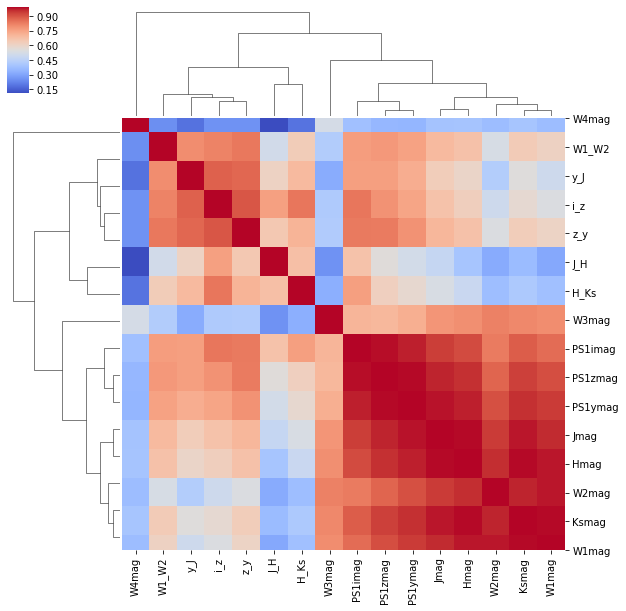

In [119]:
X_ = dx.loc[:, 'PS1imag':'W1_W2']
corr_matrix = X_.corr(method='spearman')
res = sns.clustermap(corr_matrix, method='weighted', figsize=(10, 10), cmap='coolwarm')

Selecting features with selector

In [ ]:
import shap

df_x = pandas.DataFrame(data=X_train2, columns=cols.columns)


In [ ]:
explainer = shap.Explainer(best_svc.predict, df_x)
shap_values = explainer(df_x)


Permutation explainer: 2390it [13:06,  3.01it/s]                          


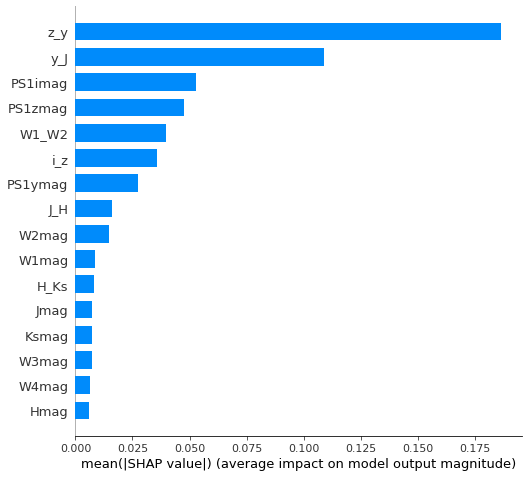

In [ ]:
shap.summary_plot(shap_values, df_x, plot_type="bar")

In [ ]:
dfy= pandas.DataFrame(data=y_val.values, columns=['y_true'])
dfy['y_pred_rf'] = y_pred_rf
dfy['y_pred_svm'] = y_pred_bsvc
dfy['y_pred_tab'] = y_pred_tbn

dfy.loc[dfy['y_true']!=dfy['y_pred_rf']]

,y_true,y_pred_rf,y_pred_svm,y_pred_tab
99,False,True,True,True
157,False,True,True,True
232,False,True,True,True
297,False,True,True,True
324,True,False,False,False
330,False,True,True,True
335,True,False,False,False
434,False,True,True,True
599,False,True,False,False
618,False,True,True,True


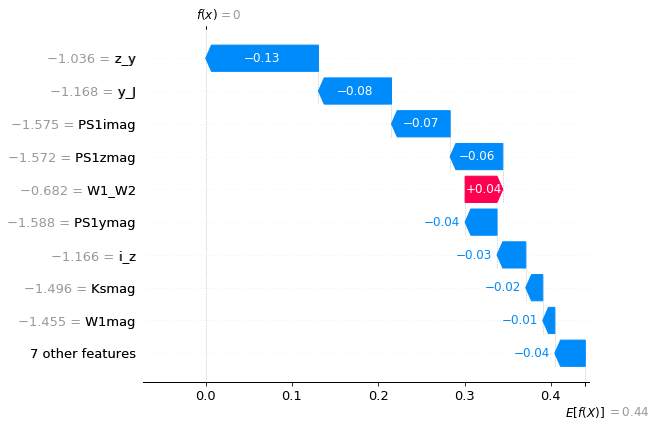

In [ ]:
shap.plots.waterfall(shap_values[293,:])